# Left hemispheric subdivisions

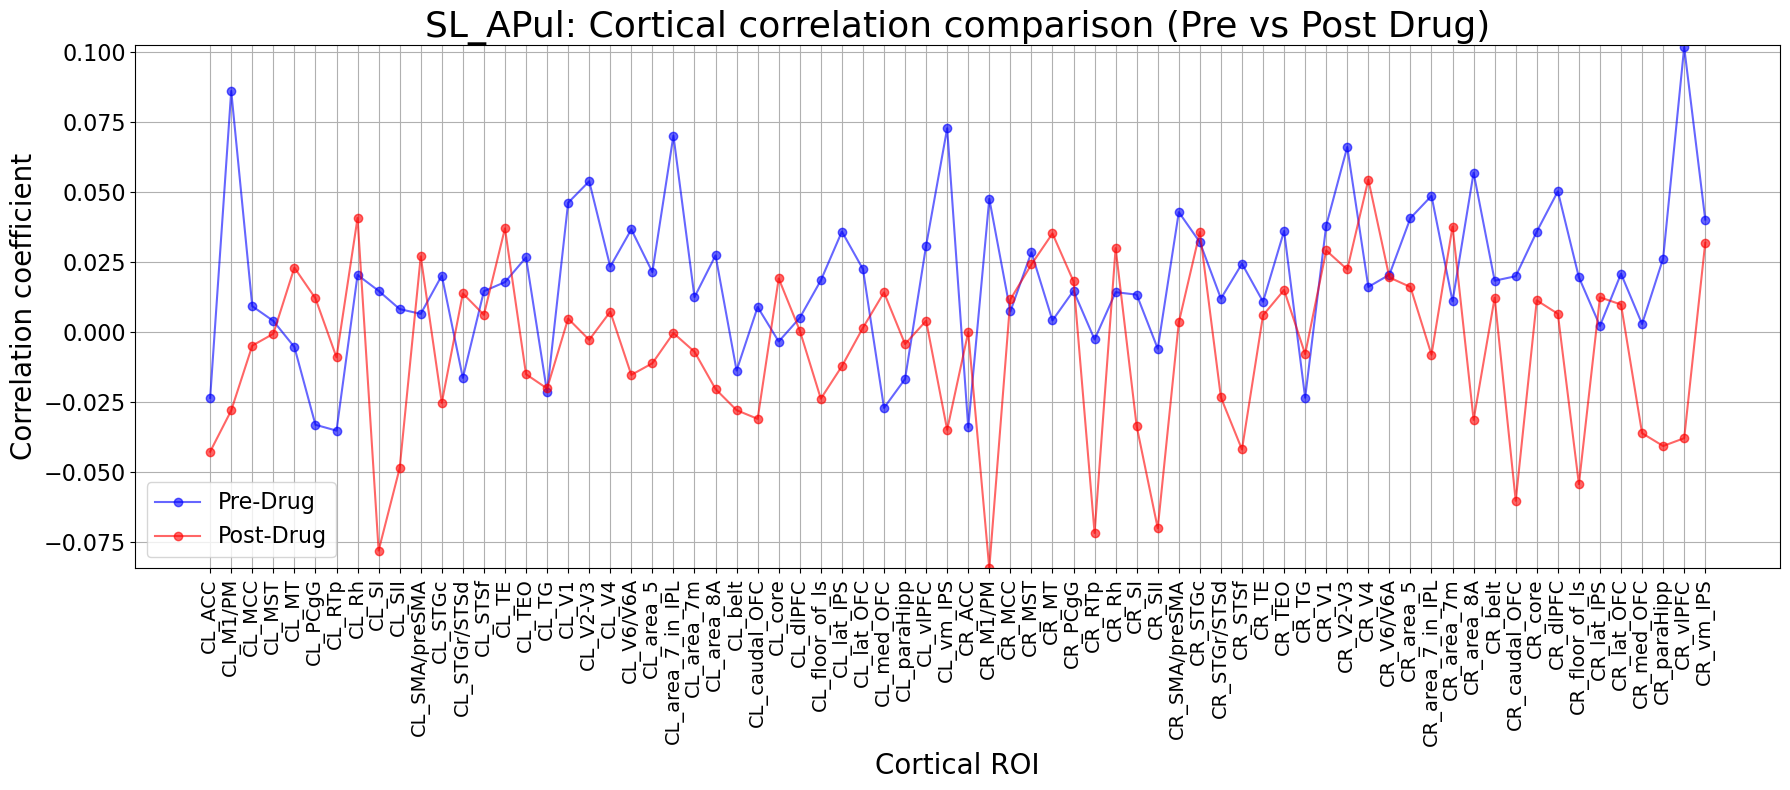


 Statistical Tests per Subdivision (Pre vs Post)


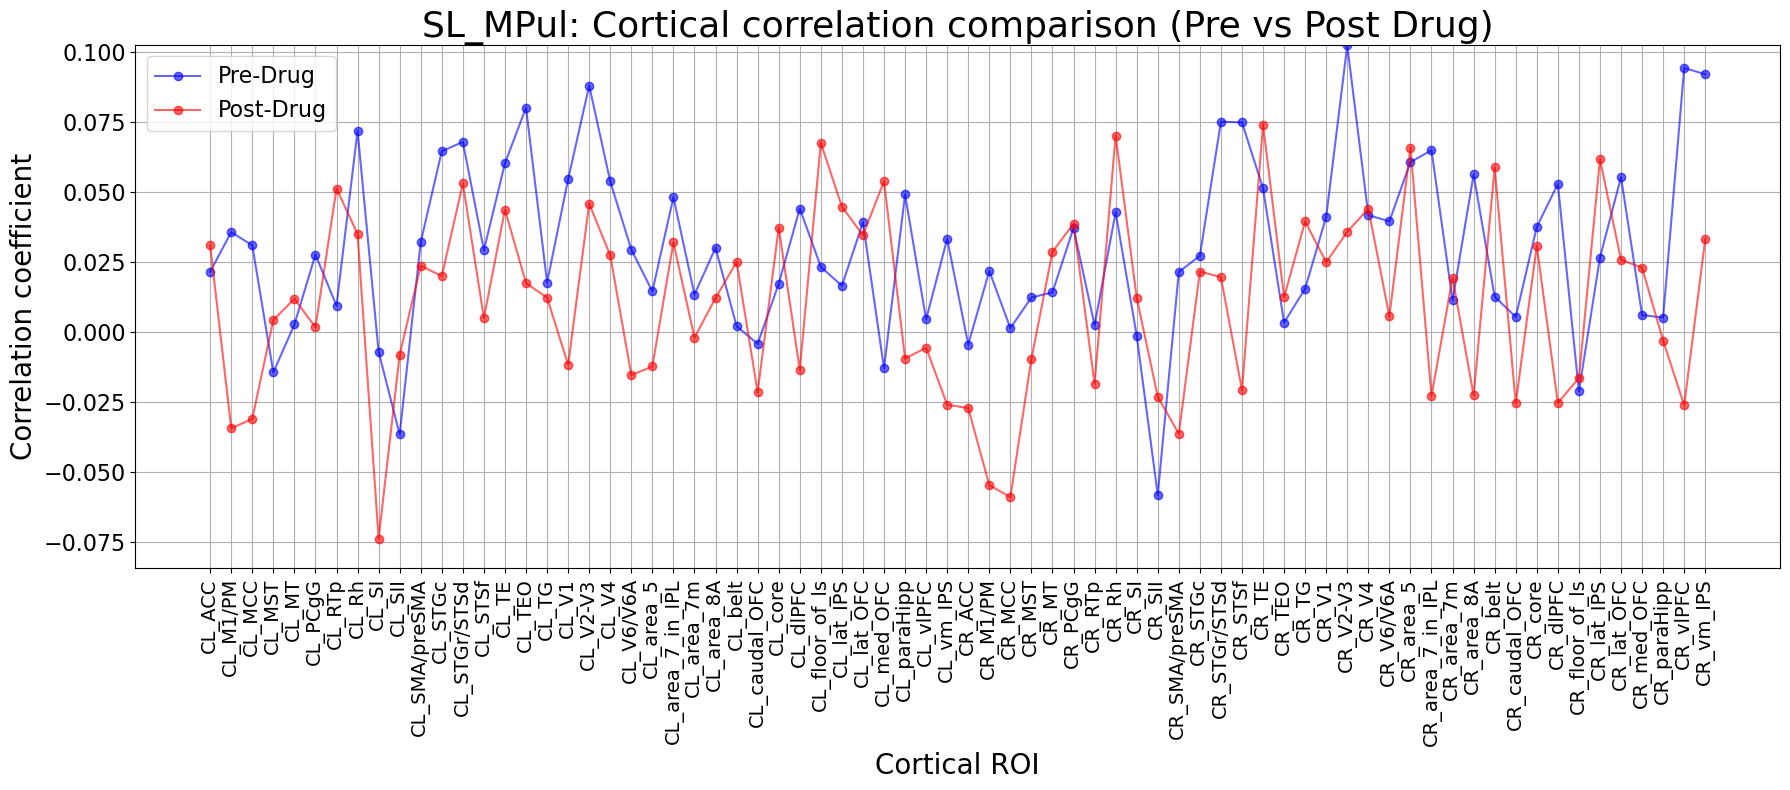


 Statistical Tests per Subdivision (Pre vs Post)


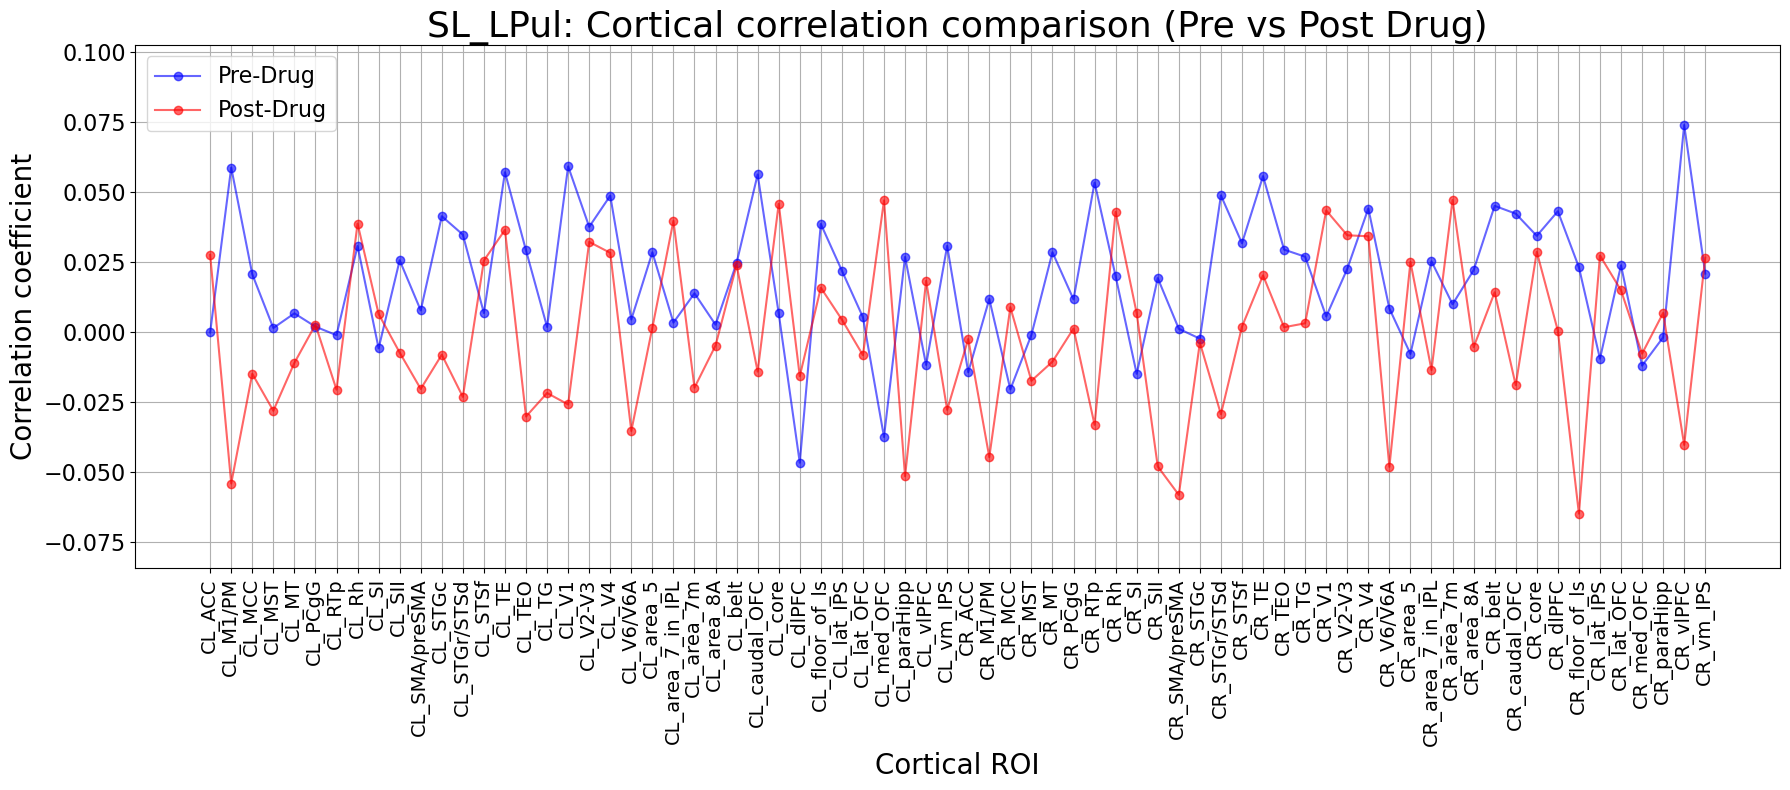


 Statistical Tests per Subdivision (Pre vs Post)


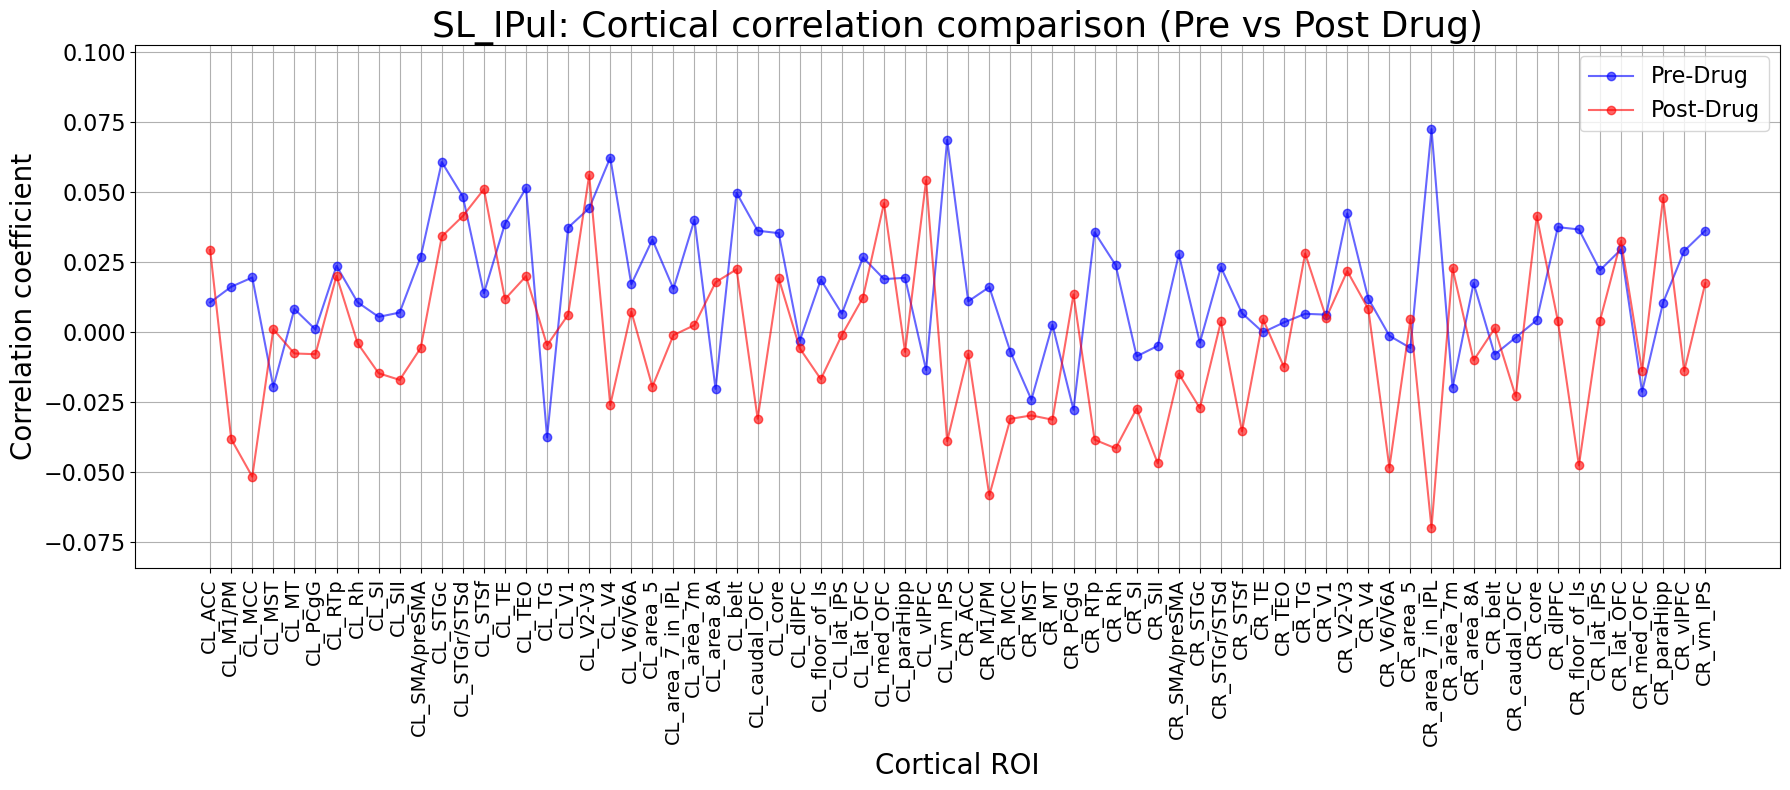


 Statistical Tests per Subdivision (Pre vs Post)


In [5]:
import csv
import matplotlib.pyplot as plt

def lade_daten(dateipath, label, subdivisions):
    """Loads data from a CSV file and returns it grouped by subdivision and cortical ROI."""
    with open(dateipath, mode='r', newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        # Keep only rows where Variable1 is in subdivisions and Variable2 starts with 'C'
        data = [row for row in reader if row['Variable1'] in subdivisions and row['Variable2'].startswith('C')]

    grouped_data = {subdiv: {} for subdiv in subdivisions}
    value_list = []

    for row in data:
        subdiv = row['Variable1']
        roi = row['Variable2']
        value = float(row['Correlation'])  

        grouped_data[subdiv][roi] = value
        value_list.append(value)

    return grouped_data, value_list, label

def erstelle_vergleichsdiagramme(pre_file, post_file):
    subdivisions = ['SL_APul', 'SL_MPul', 'SL_LPul', 'SL_IPul']

    # Load data for pre and post conditions
    pre_data, pre_values, pre_label = lade_daten(pre_file, "Pre-Drug", subdivisions)
    post_data, post_values, post_label = lade_daten(post_file, "Post-Drug", subdivisions)

    # Determine y-axis limits
    y_min = min(pre_values + post_values)
    y_max = max(pre_values + post_values)

    colors = {'Pre-Drug': 'blue', 'Post-Drug': 'red'}

    for subdiv in subdivisions:
        plt.figure(figsize=(18, 8))

        # Combine ROIs from both datasets
        rois = sorted(set(pre_data[subdiv].keys()) | set(post_data[subdiv].keys()))

        # Create value lists, fill in NaN for missing ROIs
        pre_vals = [pre_data[subdiv].get(roi, float('nan')) for roi in rois]
        post_vals = [post_data[subdiv].get(roi, float('nan')) for roi in rois]

        # Plot lines for pre and post condition
        plt.plot(rois, pre_vals, label=pre_label, color=colors[pre_label], marker='o', linewidth=1.5, alpha=0.6)
        plt.plot(rois, post_vals, label=post_label, color=colors[post_label], marker='o', linewidth=1.5, alpha=0.6)

        # Format the plot
        plt.title(f'{subdiv}: Cortical correlation comparison (Pre vs Post Drug)', fontsize=26)
        plt.xlabel('Cortical ROI', fontsize=20)
        plt.ylabel('Correlation coefficient', fontsize=20)
        plt.xticks(rotation=90, fontsize=14)
        plt.yticks(fontsize=16)
        plt.ylim(y_min, y_max)
        plt.grid(True)
        plt.legend(fontsize=16)
        plt.tight_layout()
        plt.savefig(f'{subdiv}_pre_post_comparison.png', dpi=200)
        plt.show()

        from scipy.stats import ttest_rel, wilcoxon

        print("\n Statistical Tests per Subdivision (Pre vs Post)")

        for subdiv in subdivisions:
            common_rois = sorted(set(pre_data[subdiv].keys()) & set(post_data[subdiv].keys()))

            if len(common_rois) < 2:
                print(f"{subdiv}: Too few overlapping ROIs ({len(common_rois)}) – test skipped.")
                continue
                
            pre_vals = [pre_data[subdiv][roi] for roi in common_rois]
            post_vals = [post_data[subdiv][roi] for roi in common_rois]

            #print(f"\n--- {subdiv} ({len(common_rois)} ROIs) ---")

            # Paired t-test
            t_stat, t_p = ttest_rel(pre_vals, post_vals)
            #print(f"t-Test: t = {t_stat:.4f}, p = {t_p:.4f}")

            # Paired Wilcoxon test
            try:
                w_stat, w_p = wilcoxon(pre_vals, post_vals)
                #print(f"Wilcoxon test: W = {w_stat:.4f}, p = {w_p:.4f}")
            except ValueError as e:
                print(f"Wilcoxon test not possible: {e}")

erstelle_vergleichsdiagramme('long_correlation_matrix_Linus_predrug_002.csv', 'long_correlation_matrix_Linus_postdrug_002.csv')


# Right hemispheric subdivisions

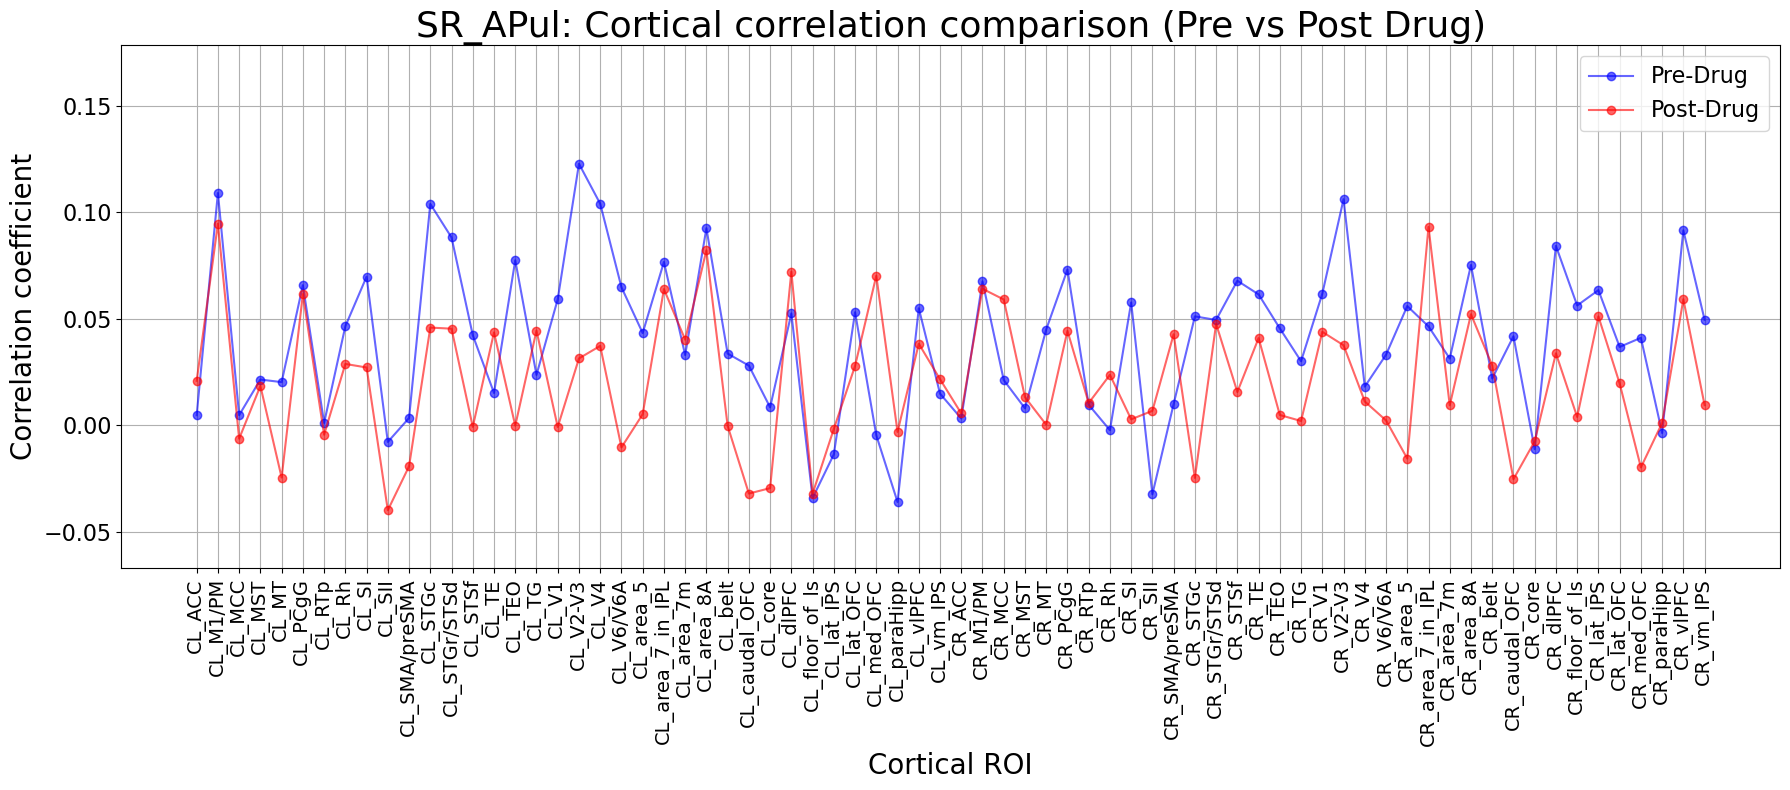


 Statistical Tests per Subdivision (Pre vs Post)


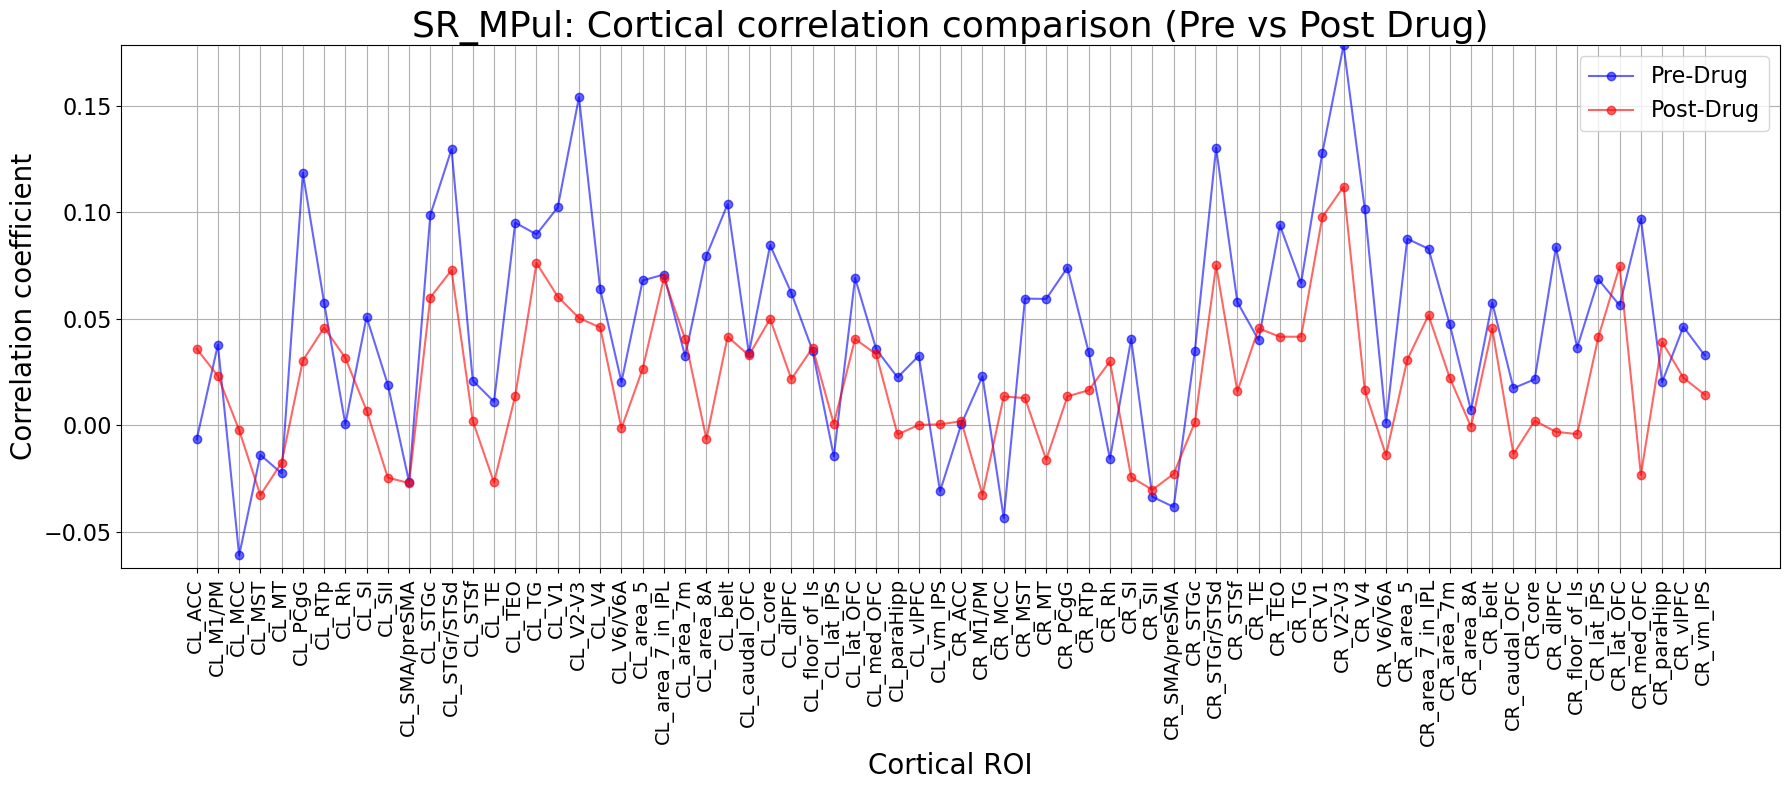


 Statistical Tests per Subdivision (Pre vs Post)


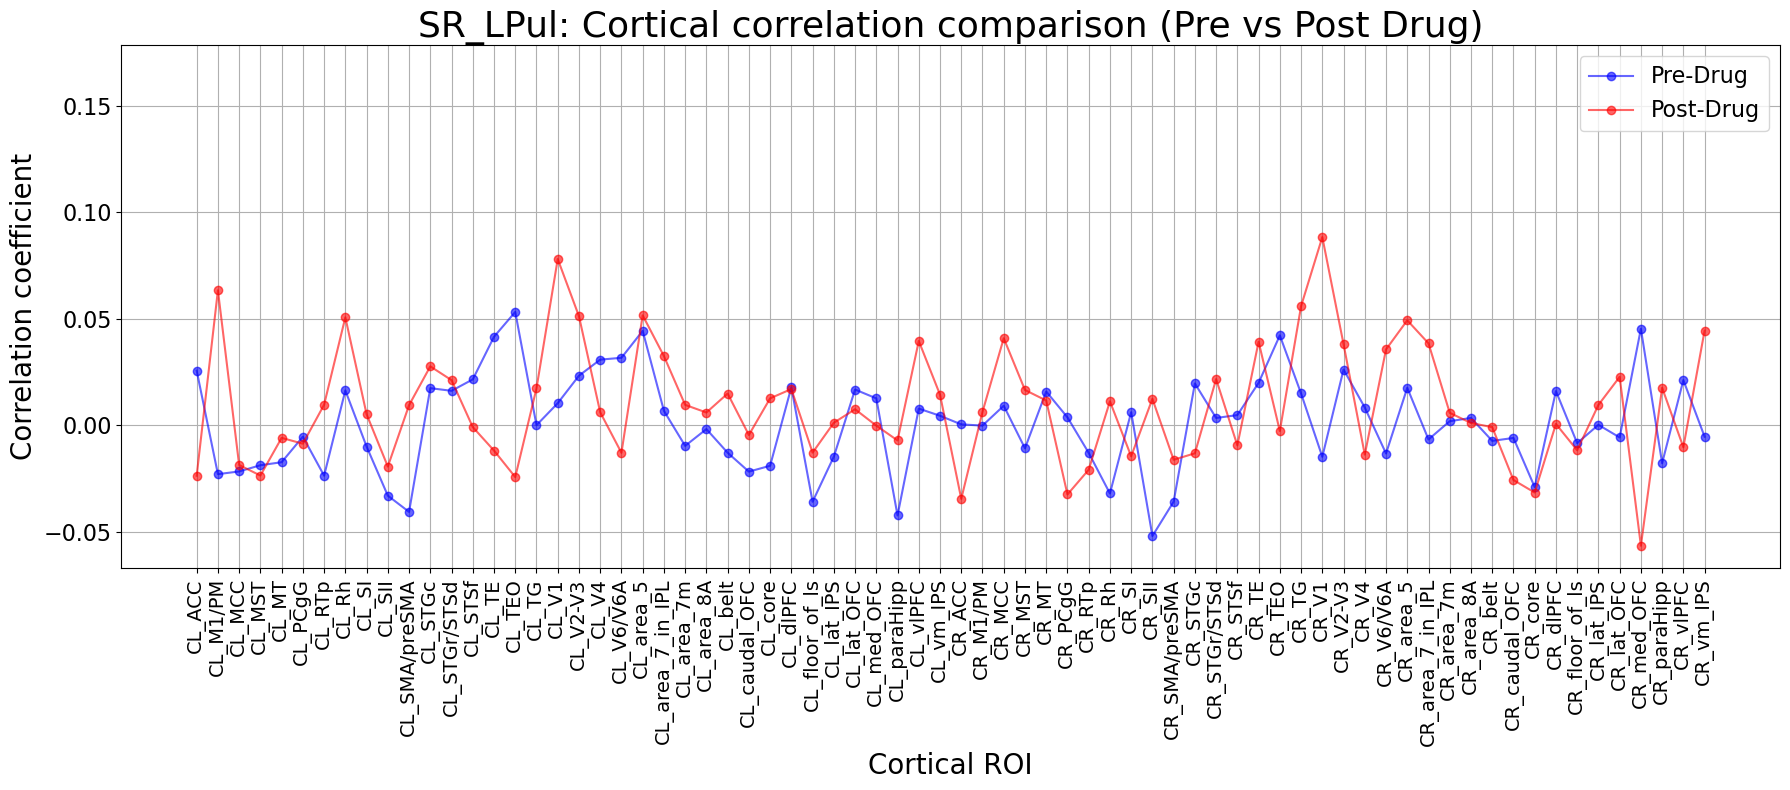


 Statistical Tests per Subdivision (Pre vs Post)


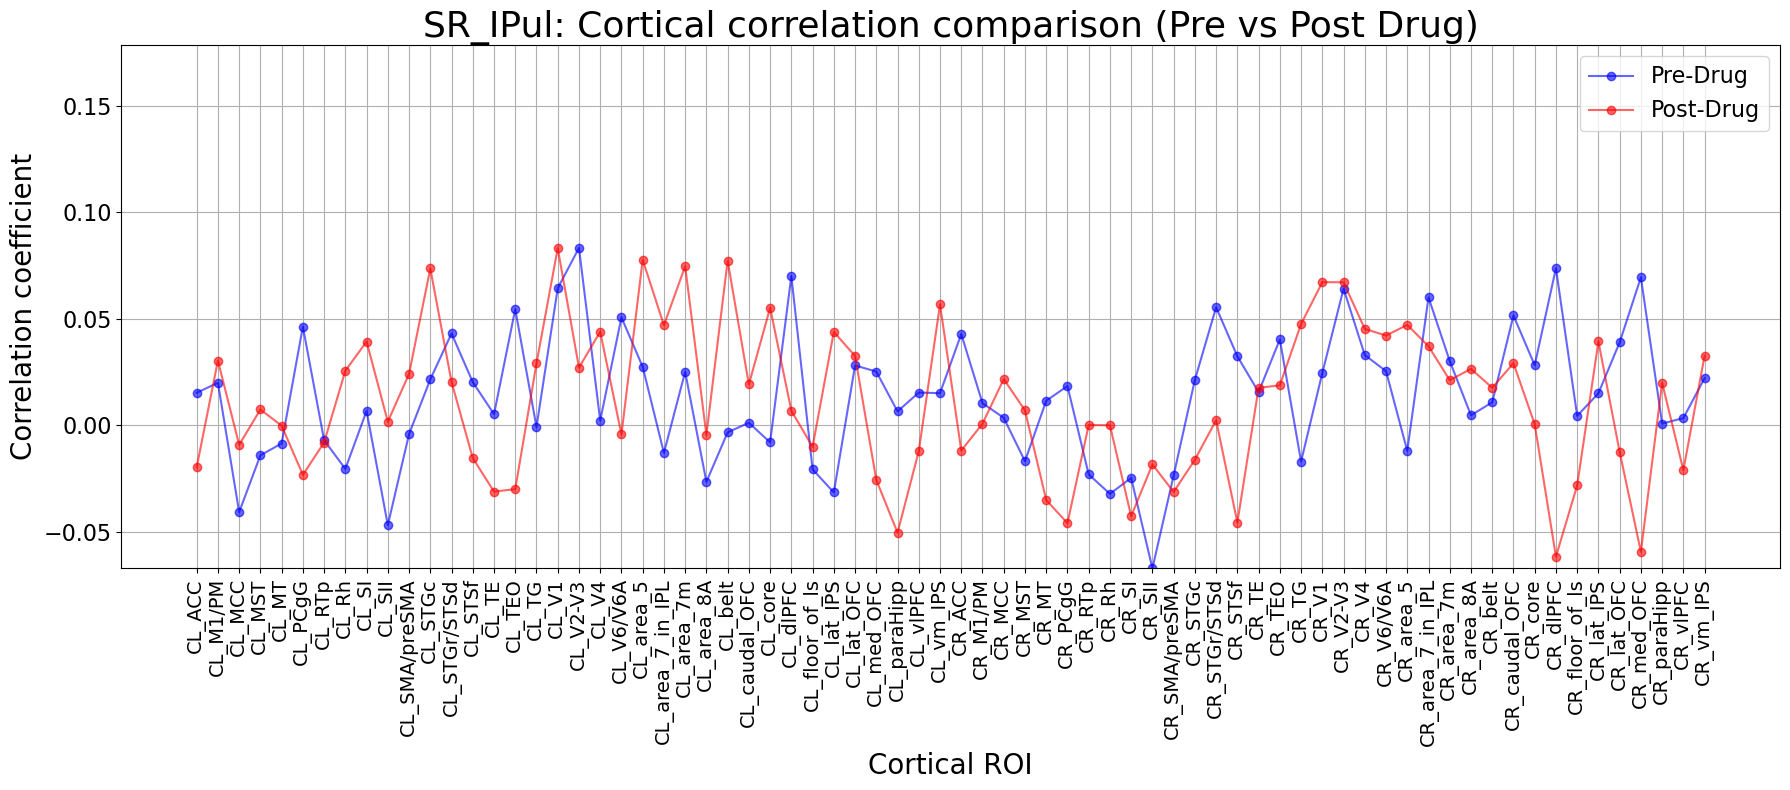


 Statistical Tests per Subdivision (Pre vs Post)


In [6]:
import csv
import matplotlib.pyplot as plt

def load_data(filepath, label, subdivisions):
    """Loads data from a CSV file and returns it grouped by subdivision and cortical ROI."""
    with open(filepath, mode='r', newline='', encoding='utf-8') as csvfile:
        reader = csv.DictReader(csvfile)
        # Only keep rows where Variable1 is in subdivisions and Variable2 starts with 'C'
        data = [row for row in reader if row['Variable1'] in subdivisions and row['Variable2'].startswith('C')]

    grouped_data = {subdiv: {} for subdiv in subdivisions}
    value_list = []

    for row in data:
        subdiv = row['Variable1']
        roi = row['Variable2']
        value = float(row['Correlation']) 

        grouped_data[subdiv][roi] = value
        value_list.append(value)

    return grouped_data, value_list, label

def create_comparison_plots(pre_file, post_file):
    subdivisions = ['SR_APul', 'SR_MPul', 'SR_LPul', 'SR_IPul']

    # Load pre- and post-drug data
    pre_data, pre_values, pre_label = load_data(pre_file, "Pre-Drug", subdivisions)
    post_data, post_values, post_label = load_data(post_file, "Post-Drug", subdivisions)

    # Determine the min and max y-axis values
    y_min = min(pre_values + post_values)
    y_max = max(pre_values + post_values)

    colors = {'Pre-Drug': 'blue', 'Post-Drug': 'red'}

    for subdiv in subdivisions:
        plt.figure(figsize=(18, 8))

        # Combine all ROIs from pre and post data
        rois = sorted(set(pre_data[subdiv].keys()) | set(post_data[subdiv].keys()))

        # Extract values, use NaN for missing ROIs
        pre_vals = [pre_data[subdiv].get(roi, float('nan')) for roi in rois]
        post_vals = [post_data[subdiv].get(roi, float('nan')) for roi in rois]

        # Plot pre- and post-drug lines
        plt.plot(rois, pre_vals, label=pre_label, color=colors[pre_label], marker='o', linewidth=1.5, alpha=0.6)
        plt.plot(rois, post_vals, label=post_label, color=colors[post_label], marker='o', linewidth=1.5, alpha=0.6)

        # Formatting the plot
        plt.title(f'{subdiv}: Cortical correlation comparison (Pre vs Post Drug)', fontsize=26)
        plt.xlabel('Cortical ROI', fontsize=20)
        plt.ylabel('Correlation coefficient', fontsize=20)
        plt.xticks(rotation=90, fontsize=14)
        plt.yticks(fontsize=16)
        plt.ylim(y_min, y_max)
        plt.grid(True)
        plt.legend(fontsize=16)
        plt.tight_layout()
        plt.savefig(f'{subdiv}_pre_post_comparison.png', dpi=200)
        plt.show()

        from scipy.stats import ttest_rel, wilcoxon

        print("\n Statistical Tests per Subdivision (Pre vs Post)")

        for subdiv in subdivisions:
            common_rois = sorted(set(pre_data[subdiv].keys()) & set(post_data[subdiv].keys()))

            if len(common_rois) < 2:
                print(f"{subdiv}: Too few overlapping ROIs ({len(common_rois)}) – test skipped.")
                continue

            # Extract values in the same order
            pre_vals = [pre_data[subdiv][roi] for roi in common_rois]
            post_vals = [post_data[subdiv][roi] for roi in common_rois]

            #print(f"\n--- {subdiv} ({len(common_rois)} ROIs) ---")

            # Paired t-test
            t_stat, t_p = ttest_rel(pre_vals, post_vals)
            #print(f"t-Test: t = {t_stat:.4f}, p = {t_p:.4f}")

            # Paired Wilcoxon test
            try:
                w_stat, w_p = wilcoxon(pre_vals, post_vals)
                #print(f"Wilcoxon test: W = {w_stat:.4f}, p = {w_p:.4f}")
            except ValueError as e:
                print(f"Wilcoxon test not possible: {e}")

create_comparison_plots('long_correlation_matrix_Linus_predrug_002.csv', 'long_correlation_matrix_Linus_postdrug_002.csv')
